<div id="toggle_code">...</div>

<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.5.1/jquery.min.js"></script>

<script src="https://cdn.jsdelivr.net/gh/philipwlewis/jupyterlab-toc-toggle@1.0/jlab-toc-toggle.js"></script>

<style>

.jlab-table td {

border: 1px solid black !important;

text-align: center !important;

background: white !important;

}

.jlab-table table {

background: white !important;

margin: 1em auto 1em auto !important;

text-align: center !important;

border-collapse: collapse !important;

border: 1px solid black !important;

}

.jlab-table th {

border: 1px solid black !important;

text-align: center !important;

background: aliceblue !important;

}

</style>

# Introduction

The approximate number system (ANS) is a cognitive system that non-verbally estimates the numerousness, which gives individuals an immediate and intuitive sense for numbers and their association [[1]](#Park_and_Starns,_2015). It is generated by intraparietal sulcus neurons and area lateral intraparietal cortex neurons, and is a system ancient in evolutionary terms for numerical thought [[2]](#Halberda_and_Odic,_2015).

The correlation between the ANS and arithmetic abilities is a subject of recent studies. In fact, recent research suggests that rapid numerical processing is important in explaining the relationship between ANS and arithmetic abilities [[3]](#Shen_and_Wei,_2023). Therefore, it can be inferred that individuals with a higher ANS accuracy likely have a higher accuracy in math as well. These insights are valuable for developing educational strategies and for research in cognitive abilities, highlighting the role of ANS in numerical understanding and processing. Thus, for this study, we investigate the correlation between ANS and math ability, as well as possible correlations between ANS and memory or spatial abilities by hypothesising that these correlations exist.

Next, we aim to explore sex differences in various cognitive abilities. Sex differences for memory have been uncovered that generally, female superiority exists in both episodic and object location memory [[4]](#Loprinzi_and_Frith,_2018). Cross national studies suggest that although there are no innate sex differences in mathematical reasoning ability, males tend to perform better due to environmental influences [[5]](#Benbow_and_Stanley,_1980), [[6]](#Geary,_1996). A male advantage is also found to be significant in spatial abilities in a recent study, likely due to a more intricate neurocognitive system that supports 3D space navigation [[7]](#Tsigemen_et_al.,_2023). In contrast, no significant sex differences were observed for approximate number sense [[8]](#Tosto_et_al.,_2014). Therefore, the second hypothesis for this investigation is a significant sex difference in math, memory, and spatial ability scores, and insignificant sex difference in ANS scores.

# Methods

This study involved 41 second-year university students (26 females, 15 males). Participants were informed about the tests and asked to provide their sex and an anonymous ID, derived from a childhood friend's initials and a favorite actor/actress, to ensure unbiased data collection. Consent for data submission via Google Forms, shown in [Figure 1.1](#figure1.1), was secured post-ANS test and before others, guaranteeing data accuracy and integrity, particularly in rapid trials.

<a id="figure1.1"></a>
```python
# This function sends the data collected in a dictionary into a Google form via url
def send_to_google_form (data_dict, form_url):
    form_id = form_ur1[34:90]
    view_form_url = "https://docs-google.com/forms/d/e/1FAIpQLSeEYE5ASv-DDZj0w286yQZC38wXJeNW3qhMdBVmjUB1I]R1RQ/viewform"
    post_form_url = "https://docs-google.com/forms/d/e/1FAIpQLSeEYE5A5v-DDZj0w286yQZC38wXJeNW3qhMdBVmjUB1I1R1RQ/formResponse"
    
    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser") find('script', type='text/javascript')
    content = content.text[27:-1]
    result = json.loads(content)[1][1]
    form_dict = {}
    
    loaded_all = True
    for item in result:
        if item[1] not in data_dict:
            print(f"Form item (item[1]} not found. Data not uploaded. ")
            loaded_all = False
            return False
        form_dict[f'entry-(item[4][0][0]}'] = data_dict[item[1]]
    
    post_result = requests.post(post_form_url, data=form_dict)
    return post_result.ok
```
Fig 1.1 Function for uploading a result dictionary into google form

## ANS Test

For the ANS Test, a global dictionary is created to store all data. User's sex is selected using toggle buttons [(Fig 1.2)](#figure1.2) to only collect desired responses. All sections are displayed in one bordered box. This ensures user’s focus on the content during test [(Fig 1.3)](#figure1.3).
<a id="figure1.2"></a>

![Toggle buttons for selecting sex.](photos_for_report/1.2.png)
Fig 1.2 Toggle buttons for selecting sex.
<a id="figure1.3"></a>

```python
box = widgets.VBox([], layout = widgets.Layout(width='500px', height='550px', border='2px solid'))
display(box)

box.children = [panel]

# The test is started upon clicking the start button and the time is recorded
result = wait_for_response()
box.children = []
```
Fig 1.3 Code for the box that displays sections by changing children.

64 images are created using dot ratios of 4:3, 7:6, 9:8, and 10:9 on 2 sides. Dots do not overlap and are the same size. All images are displayed in random order. For each trial, an image is displayed for 0.75s, then 2 buttons appear [(Fig 1.4)](#figure1.4). User needs to click the more dots side. On button click or 3s passing, whichever earlier, buttons disappear to prevent further response [(Fig 1.5)](#figure1.5) and enter 1.5s intertrial interval to break user from the trial to retain acuity. <a id="figure1.4"></a>

<img src="photos_for_report/1.4.png" alt="Fig 1.4 An example test image and buttons." width="50%"/>

Fig 1.4 An example test image and buttons.

```python
panel1 = widgets.HBox([left, right], layout = widgets.Layout(display='flex', flex_flow='row', align_items='center', width='500px'))

        # Left/right buttons appear
        # Collect the time at which the user is expected to start responding
        start = time.time()
        panel1.layout.display = ''
        
        # Accept user response until 3 seconds
        result = wait_for_response(timeout=3)

        choice = result['choice']
        if choice == "":
            panel1.layout.display = 'none'
        
        else:
            u = i
            
            # Once the user responds or 3 seconds is up, whichever is earlier,
            # the trial is complete
            # Buttons are removed before the onset of the intertrial buffer time
            panel1.layout.display = 'none'
```
Fig 1.5 Panel 1 contains the buttons. By changing its display, buttons can appear and disappear.

3s waiting time forces users to quick decisions, making sure responses are from instincts to test their natural numerical sense. If users click within 3s, their choice is checked for correctness [(Fig 1.6)](#figure1.6). Number of correct / wrong responses for dot ratio and in total increases by 1, and total number of responses increases by 1. Else, the trial is excluded from results. Results include correct rates for each dot ratio, total correct and wrong answers (raw data), total correct rate (score), and time taken to complete test (shown to users). [Fig 1.7](#figure1.7) shows how results are saved.

<a id="figure1.6"></a>
```python
# Check if the button clicked by the user matches the correct choice
if choice == "Left":
    if u in Left:
        for i in data_type:
            if u in data_type[i]:
                Judge [f"C{i}"]+= 1
                total_correct += 1
    else:
        for i in data_type:
            if u in data_type[i]:
                Judge [f"W{i}"]+= 1
                total_wrong += 1              
elif choice == "Right":
    if u in Right:
        for i in data_type:
            if u in data_type[i]:
                Judge [f"C{i}"]+= 1
                total_correct += 1
    else:
        for i in data_type:
            if u in data_type[i]:
                Judge [f"W{i}"]+= 1
                total_wrong += 1
```
Fig 1.6 The codes to check the button description from click.

<a id="figure1.7"></a>
```python
# Assign the number of correct and wrong responses for each ratio to the corresponding variables
C76 = Judge ["(76"]
C43 = Judge ["(43"]
C98 = Judge ["'C98"]
C109 = Judge ["C109"]
W76 = Judge ["W76" ]
W43 = Judge ["W43"]
W98 = Judge ["W98"]
W109 = Judge ["W109"]

# All relevant data collected from the test are stored in the outcome dictionary
outcome ["76 Correct Rate"] = C76 / (C76 + W76)
outcome ["43 Correct Rate"] = C43 / (C43 + W43)
outcome ["98 Correct Rate"] = C98 / (C98 + W98)
outcome ["109 Correct Rate"] = C109 / (C109 + W109)
outcome ["Total Correct"] = total_correct
outcome ["Total Wrong"] = total_wrong
outcome ["Correct Rate"] = correct_rate
outcome ["Time Taken"] = time_taken

time.sleep (0.5)

return outcome
```
Fig 1.7 key - value pairs are added to the global dictionary

## Math Test

The Math Test is designed to evaluate arithmetic skills. It is structured to escalate in difficulty, presenting a variety of arithmetic questions to participants. The test consists of a series of arithmetic questions displayed sequentially. Questions include simple arithmetic (e.g., “9 + 6”, “12 - 5”), multiplication and division (e.g., “9 x 5”, “21 ÷ 7”), exponentiation (e.g., "5²", "3³"), and combination of operations (e.g., "12 + 6 - 20", "16 - 7 + 27"). Participants have two attempts to answer each question correctly, with difficulty level increasing progressively to challenge their numerical processing skills progressively. Upon completion, total score is compiled into a data dictionary. This information is then uploaded to a Google Form for storage and future analysis.

## Memory Test

For the Memory Test, a global dictionary is created to store all data recorded in this test.

The test runs using a loop that displays an array with shapes to allow users to memorise for 10 seconds, then the adequate set of questions [(Fig 1.8)](#figure1.8). The questions are displayed for a limited time period. Questions were answered through RadioButtons widgets to avoid inconsistencies in the answers [(Fig 1.9)](#figure1.9). Afterwards, the test moves on to the next array, and the answers clicked are recorded and stored to the global dictionary. Throughout the test, score is added using the count += 1 function for each correct response. At the end, a message is displayed with the final count to indicate correctness of the responses.

<a id="figure1.8"></a>
```python
def run_memory_test():
    with global_output:
        total_score = 0
        
        for image, questions in arrayas. items():
            user_responses = display_image_and_questions_with_radio_buttons(image, questions, image_correct_answers[image])
            
            score = 0
            for question, answer in user_responses. items():
                correct = answer == image_correct_answers[image] [question]
                score += int(correct)
                data_saver.add_answer(question, answer)
                
            total_score += score
```
Fig 1.8 the function that runs the memory test

<a id="figure1.9"></a>
```python 
def display_image_and_questions_with_radio_buttons(image, questions, correct_answers, input_time=4):
    display(image)
    time.sleep (1)
    clear_output(wait=True)
    
    user_responses = {}
    
    for question, options in questions.items():
        radio_buttons = widgets.RadioButtons(options=options, description=question)
        display(radio_buttons)
        time.sleep(input_time)
        user_responses[question] = radio_buttons.value
        clear_output(wait=True)
        
    return user_responses
```
Fig 1.9 the code for using radio buttons to collect response

## Spatial Abilities Test

The assessment of spatial abilities was conducted using a Python GUI application, specifically designed for ease of use by participants. They were presented with up to six images, each within a time limit of 300 seconds [(Fig 1.10)](#figure1.10). The images consisted of a three-dimensional shape formed from coloured cubes, and four two-dimensional projections of these shapes on a plane parallel to one of the shape's faces. The task required participants to identify which projection did not match the three-dimensional figure.

Participants made their selections using four buttons labelled A, B, C, and D, corresponding to each projection. Once a selection was made, it could not be changed. The puzzles varied in terms of shape complexity and the number of colours used.

<a id="figure1.10"></a>
<img src="photos_for_report/2.0.png" alt="Figure 2.0 Example of a puzzle completed by participants. In this example, answer D is correct, as the 3D shape cannot possibly match this projection." width="50%"/>

Fig 1.10 Example of a puzzle completed by participants. In this example, answer D is correct, as the 3D shape cannot possibly match this projection.

# Results
## ANS and other cognitive tests

<a id="figure2.1"></a>

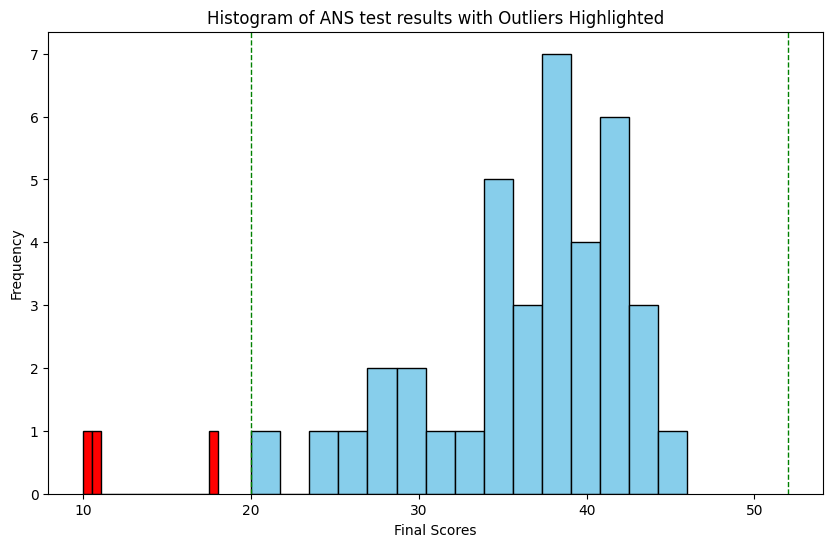

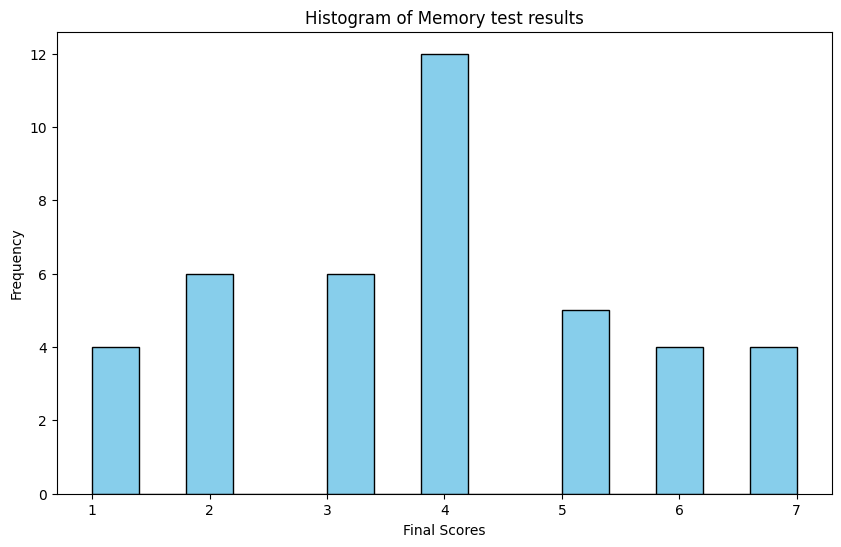

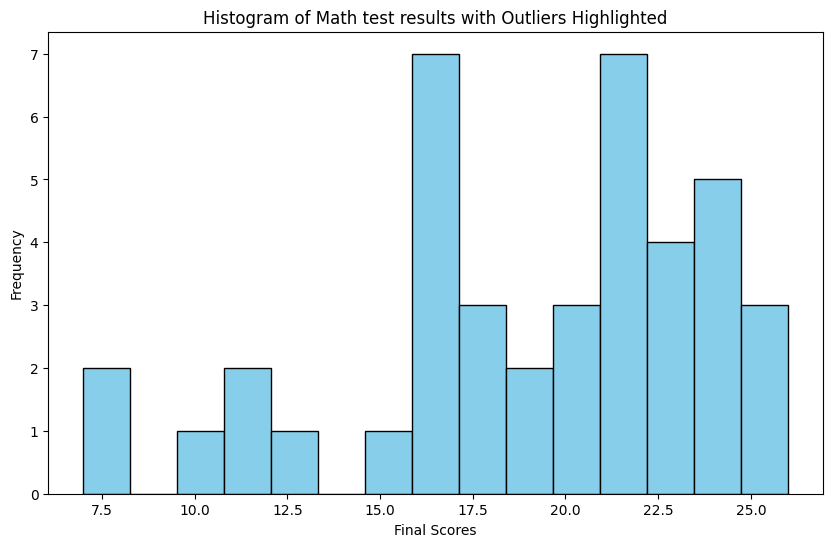

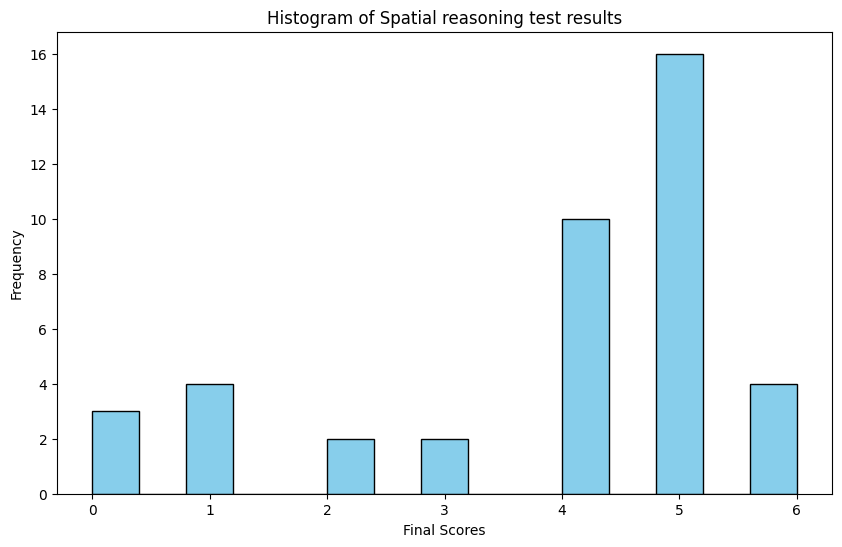

In [9]:
%run histogram_ANS.ipynb
histogram_outliers_ANS()
%run histogram_memory.ipynb
memory_histogram()
%run histogram_math.ipynb
histogram_math()
%run histogram_spatial.ipynb
histogram_spatial()

Fig 2.1 Histograms of ANS, Memory, Math, and Spatial reasoning test results, in order.

Histograms [(Fig 2.1)](#figure2.1) show total score distributions for all tests, with outliers present only in ANS results. The distributions mildly mimic normality, expected in this sample size, and would approach a standard deviation of 1 with a larger sample, indicating closer normal distribution conformity. Typically, the most frequent scores hover near the median. Except for the memory test, a negative skew is evident, suggesting higher scores in other tests.

Scatter plots [(Fig 2.2)](#figure2.2) display individual ANS scores against other tests, with axes slightly extended beyond the 0-1 score range for clarity. These plots reveal a non-linear relationship, suggesting a lack of correlation between ANS scores and other test performances. <a id="figure2.2"></a>

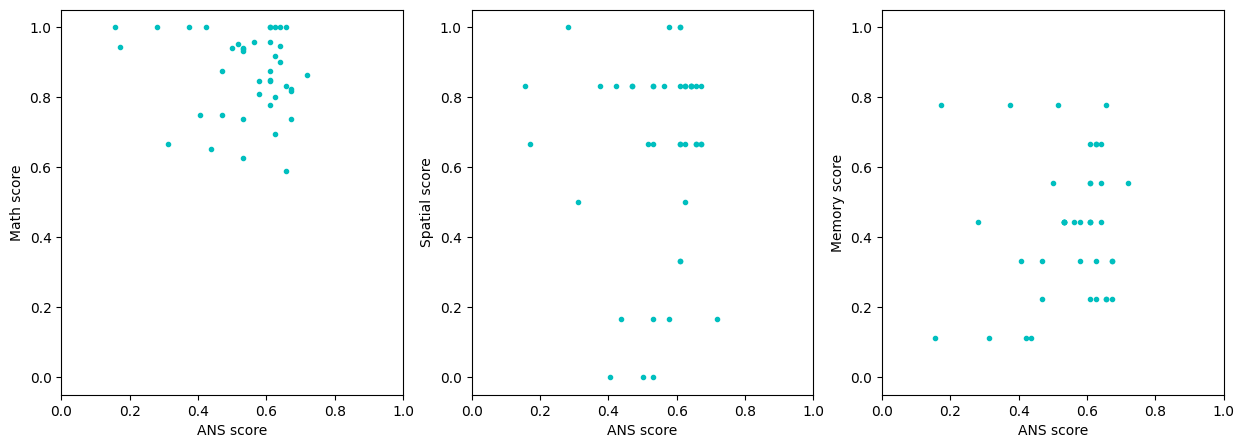

In [10]:
%run Data_Plotting_Joanna.ipynb
scatter_plots()


Fig 2.2 Scatter plots showing the ANS score against the other test scores respectively.

Spearman’s Rank correlation assesses whether a monotonic relationship exists between 2 variables [[9]](#PRESS_et_al.,_1992). To confirm observation from the scatter plots, Spearman’s Rank correlation coefficient (rho) and significance (P) is calculated [(Fig 2.3)](#figure2.3). Integer ranks are calculated for scores of each test in descending order, and tied scores are then assigned the same rank by averaging their ranks [[10]](#Forthofer_et_al.,_2007).

All rho values (-0.132, 0.070, 0.124) are very close to zero, indicating small relatedness between ANS scores and the other test scores. Test statistic is calculated manually [(Fig 2.4)](#figure2.4) using the formula

![Formula image](photos_for_report/Formula.png)

and P-value is calculated from the test statistic using GraphPad [[11]](#P_value_calculator,_n.d.). All P-values are largely over the significance threshold (0.409, 0.663, 0.441 > 0.05) for no correlation to be true. Therefore, no correlation between ANS scores and other test scores are observed.

<a id="figure2.3"></a>
|                | ANS and Math | ANS and Spatial | ANS and Memory |
|----------------|--------------|-----------------|----------------|
| **rho**        | -0.132       | 0.070           | 0.124          |
| **p**          | 0.409        | 0.663           | 0.441          |

Fig 2.3 Table of the rho and p measured between ANS scores and the other test scores.

<a id="figure2.4"></a>
```python
# Define the n as the number of scores collected
# and df as the degree of freedom
n = len (rank_int_dict ['ans'])
df = n - 2

# Define the function to calculate the Spearman's rank coefficient (rho)
def calculate_rho_t(test):
    for i in range(n):
        d_square_dict [test] .append ((rank_int_dictl'ans'] [il - rank_int_dict[test] [i])**2)
        
    # Calculate the sum of the d squares for each test with ANS
    # and record them in the same dictionary
    d_square_dict[f'{test}_sum'] = sum(d_square_dict [test])
    rho_dict [test] = 1 - (6*(d_square_dict[f'{test}_sum']))/(n*(n**2-1))
    r = rho _dict [test]
    t_dict [test] = r * ((n-2) / (1-r**2))**(1/2)
    return d_square_dict, rho_dict, t_dict
    
# Calculate the rho of the ans score
# and each of the other test scores
for test in test_list:
    if test != 'ans':
        d_square_dict [test] = []
        calculate_rho_t(test)
```
Fig 2.4 Function to calculate SRCC and t-value.

## Sex difference in cognitive test results
<a id="figure2.5"></a>

In [11]:
%run partB.ipynb
boxplot_male_female()

Exception: File `'partB.ipynb'` not found.

Fig 2.5 Box plots comparing scores of Male and Female subjects across the conducted tests. The horizontal, in-box line denotes the median for the test results, lower and upper bounds show the IQR (25th - 75th percentile of the scores), lower and upper whiskers reach 1.5 IQR below and above the lower and upper quartiles Q1 and Q3, respectively. Outliers are denoted with an open dot.

As shown in [Fig 2.5](#figure2.5), variability in male and female performance across tests is notable, despite their methodological differences making exact reasons elusive. Standard deviation varies significantly both between tests and genders, yet median results align closely in all but spatial abilities tests. Bonferroni-corrected t-tests were employed to evaluate the significance of these observed gender differences in cognitive assessments.

<a id="figure2.6"></a>
| Test        | Mean Score Male | Standard Error Male | Mean Score Female | Standard Error Female | Difference in Score | P-Value (Bonferroni corrected) |
|-------------|-----------------|---------------------|-------------------|-----------------------|---------------------|--------------------------------|
| **Spatial** | 0.700           | 0.073               | 0.609             | 0.059                 |  0.091              | 1.000                          |
| **Memory**  | 0.385           | 0.042               | 0.457             | 0.041                 | -0.072              | 1.000                          |
| **Math**    | 0.849           | 0.034               | 0.877             | 0.022                 | -0.028              | 1.000                          |
| **Ans**     | 0.558           | 0.025               | 0.535             | 0.030                 |  0.023              | 1.000                          |

Fig 2.6 T-tests (Bonferroni corrected) showing no significant (p>0.05) differences in the results of Males and Females taking the cognitive tests.

The significance of the results was assessed using Bonferroni-corrected t-tests [(Fig 2.6)](#figure2.6). No differences (p>0.05) were found between the male and female scores in all of the cognitive tests taken. In fact, correlation of gender and cognitive test scores was fully dismissed, by obtaining p values equal to 1.000 for all comparisons, after correction for multiple comparisons. 

# Discussion

From the results of this study, no correlation is found between the ANS scores and the Math, Memory, or Spatial reasoning scores. Noticeably, the dots representing ANS against Math scores in an individual seem to cluster around a high score region, and there’s not much variation shown in the scores. This might be due to the limited type of participants that took the test. Since the test-takers mainly consist of our college classmates of similar age, the results cannot represent students of other colleges or people of other age groups.

Furthermore, there is no correlation (p = 1.000) between gender and mathematics, memory, or ANS abilities, as indicated in Figure 2.6. Thus, our second hypothesis is rejected as no evidence was found to support a claim that differences exist in cognitive tasks performance between males and females. However, males exhibited a smaller standard deviation in spatial, memory, and ANS tests compared to females, with the reverse observed in mathematics.

These findings may help explain biases in perceiving cognitive abilities between genders. The greater standard deviation in one gender implies a wider range of performance within that group. This variation might influence societal perceptions, particularly if only a certain segment is more visible in the media. For instance, the stereotype favouring males in spatial tasks could be influenced by media representation, which often overlooks low performing individuals. This can cause a skewed perception despite no significant mean differences in abilities between the genders [[12]](#Nichols,_Wild,_Owen,_&_Soddu,_2021), [[13]](#Hyde,_2016).

Future research should use diverse methods to assess gender differences in cognitive abilities and include varied participant samples beyond western university students. Investigating societal factors and media representation in relation to cognitive abilities could further elucidate the roots of these biases. This approach could clarify whether individuals commonly featured in media or public life tend to represent only certain segments of ability distributions, thus influencing public perception of sex differences in cognitive abilities.


# Bibliography

[1] <a name = "Park_and_Starns,_2015" href = "https://doi.org/10.3389/fpsyg.2015.01955">
Park, J., & Starns, J. J. (2015)</a>.
The Approximate Number System Acuity Redefined: A Diffusion Model Approach.
Frontiers in Psychology (Vol. 6). 
<br><br>

[2] <a name = "Halberda_and_Odic,_2015" href = "https://doi.org/10.1016/b978-0-12-420133-0.00012-0">
Halberda, J., & Odic, D. (2015)</a>.
The Precision and Internal Confidence of Our Approximate Number Thoughts.
Evolutionary Origins and Early Development of Number Processing (pp. 305–333). 
<br><br>

[3] <a name = "Shen_and_Wei,_2023" href = "https://doi.org/10.1016/j.lindif.2023.102318">
Shen, S., & Wei, W. (2023)</a>.
Processing speed links approximate number system and arithmetic abilities.
Learning and Individual Differences, 105, 102318.
<br><br>

[4] <a name = "Loprinzi_and_Frith,_2018" href = "https://doi.org/10.3390/jcm7060132">
Loprinzi, P., & Frith, E. (2018)</a>.
The Role of Sex in Memory Function: Considerations and Recommendations in the Context of Exercise.
Journal of Clinical Medicine (Vol. 7, Issue 6, p. 132). 
<br><br>

[5] <a name = "Benbow_and_Stanley,_1980" href = "https://doi.org/10.1126/science.7434028">
Benbow, C. P., & Stanley, J. C. (1980) </a>.
Sex Differences in Mathematical Ability: Fact or Artifact?
Science (Vol. 210, Issue 4475, pp. 1262–1264). 
<br><br>

[6] <a name = "Geary,_1996" href = "https://doi.org/10.1017/s0140525x00042400">
Geary, D. C. (1996)</a>. 
Sexual selection and sex differences in mathematical abilities.
Behavioral and Brain Sciences (Vol. 19, Issue 2, pp. 229–247). 
<br><br>

[7] <a name = "Tsigeman_et_al.,_2023" href = "https://doi.org/10.1016/j.heliyon.2023.e15247">
Tsigeman, E. S., Likhanov, M. V., Budakova, A. V., Akmalov, A., Sabitov, I., Alenina, E., Bartseva, K., & Kovas, Y. (2023)</a>.
Persistent gender differences in spatial ability, even in STEM experts.
Heliyon, 9(4), e15247.
<br><br>

[8] <a name = "Tosto_et_al.,_2014" href = "https://doi.org/10.1016/j.intell.2013.12.007">
Tosto, M. G., Petrill, S. A., Halberda, J., Trzaskowski, M., Tikhomirova, T. N., Bogdanova, O. Y., Ly, R., Wilmer, J. B., Naiman, D. Q., Germine, L., Plomin, R., & Kovas, Y. (2014)</a>.
Why do we differ in number sense? Evidence from a genetically sensitive investigation.
Intelligence, 43, 35–46. 
<br><br>

[9] <a name = "PRESS_et_al.,_1992" href = "https://archive.org/details/numericalrecipes00pres_0/page/n9/mode/2up">
PRESS, W. H., Flannery, B. P., Teukolsky, S. A., & Vetterling, W. T. (1992, January 1)</a>.
Numerical recipes in C : William H. Press : Free download, Borrow, and streaming.
Internet Archive. 
<br><br>

[10] <a name = "Forthofer_et_al.,_2007" href = "https://doi.org/10.1016/b978-0-12-369492-8.50008-x">
Forthofer, R. N., Lee, E. S., & Hernandez, M. (2007)</a>.
Descriptive Methods.
Biostatistics (pp. 21–69). 
<br><br>

[11] <a name = "P_value_calculator,_n.d." href = "https://www.graphpad.com/quickcalcs/pvalue1.cfm">
P value calculator. GraphPad by Dotmatics. (n.d.)</a>.
<br><br>

[12] <a name = "Nichols,_Wild,_Owen,_&_Soddu,_2021" href = "https://doi.org/10.3390/bs11040051">
Nichols, E. S., Wild, C. J., Owen, A. M., & Soddu, A. (2021)</a>.
Cognition across the Lifespan: Investigating Age, Sex, and Other Sociodemographic Influences.
Behavioral Sciences (Basel), 11(4), 51. 
<br><br>

[13] <a name = "Hyde,_2016" href = "https://doi.org/10.1016/j.conb.2016.02.007">
Hyde, J. S. (2016)</a>.
Sex and cognition: Gender and cognitive functions.
Current Opinion in Neurobiology, 38, 53-56. 
<br><br>